## 🔔 Jour 2 – Charger les données Titanic avec Python

Objectif du jour :


Ouvrir et explorer ton dataset Titanic directement dans Python avec pandas.


### 🟣 Étape 1 : Crée ton fichier de travail


Dans ton dossier de projet, crée un fichier appelé :
titanic_project.ipynb

### 🟣 Étape 2 : Charger les données avec pandas


In [1]:
import pandas as pd

# Charger le dataset Titanic (fichier train.csv téléchargé hier)
df = pd.read_csv("train.csv")

# Afficher les premières lignes
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 🟣 Étape 3 : Premières observations rapides
Essaye ces commandes dans l’ordre :

In [2]:
# Dimensions du dataset
print("Nombre de passagers :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

# Types de données
print(df.dtypes)

# Aperçu global
print(df.describe())

Nombre de passagers : 891
Nombre de colonnes : 12
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare

### 🟣 Étape 4 : Mini-exercice


Notes dans ton journal Notion (ou carnet) :

1. Combien y a-t-il de passagers dans ce dataset ?

2. Combien de variables ?

3. Y a-t-il des valeurs qui te semblent bizarres ou manquantes ? (âge vide ? cabine vide ?)

In [3]:
# Le nombre de passagers
df["PassengerId"].value_counts()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

In [4]:
# Le nombre variable
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [5]:
# Le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 🟣 Bonus facultatif (si tu as le temps)
Tu peux aussi afficher les 5 dernières lignes :

In [6]:
print(df.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


## 🚩 Jour 3 – Analyse exploratoire visuelle (premiers graphes)


Objectif du jour :


Explorer graphiquement les variables les plus importantes pour commencer à deviner les relations entre les caractéristiques (Sex, Age, Pclass) et la survie.

### 🟣 Étape 1 : Importer les librairies de visualisation


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optionnel pour des graphes plus jolis
sns.set(style="whitegrid")

### 🟣 Étape 2 : Visualisation de la variable "Sex"

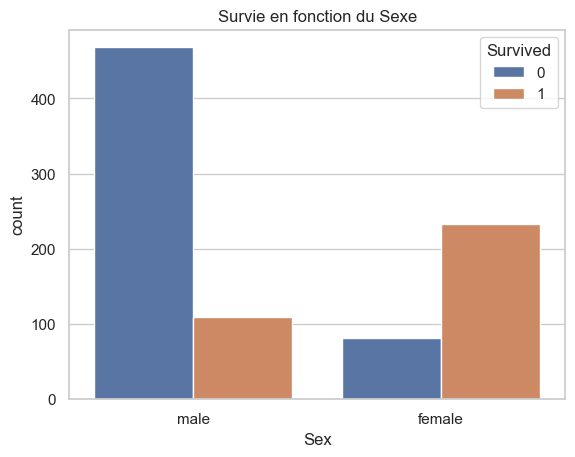

In [8]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survie en fonction du Sexe")
plt.show()

On peut noter qu'il plus de femmes qui ont survécu que les hommes, même en mettant à une échelle égale pour les 2 sexes (en terme de pourcentage).

### 🟣 Étape 3 : Visualisation de la variable "Pclass"

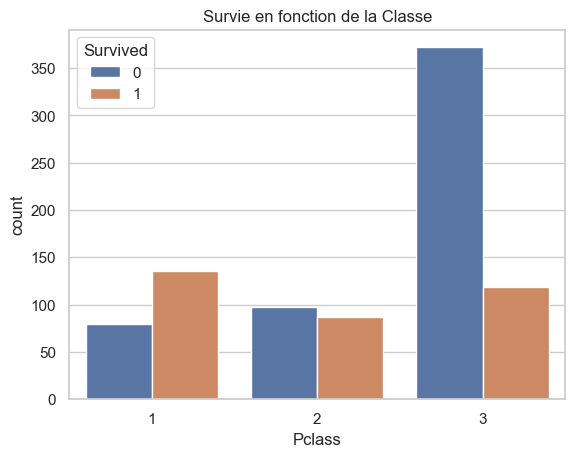

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survie en fonction de la Classe")
plt.show()

On constate qu'on survie plus en 1ère classe, puis presque à l'égalité en 2ème classe, mais le 3ème est fatale (plus de 2/3 sont morts)

### 🟣 Étape 4 : Visualisation de la variable "Age"

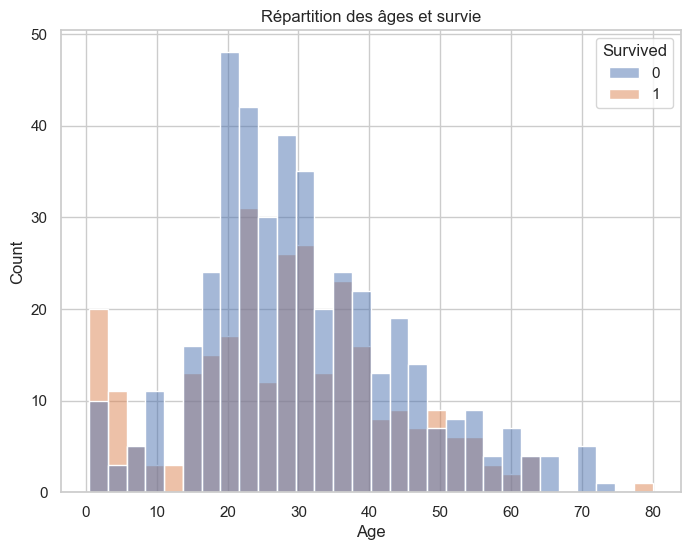

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=False)
plt.title("Répartition des âges et survie")
plt.show()

Le graphe montre qu'il y a plus de chance de survivre l'orsqu'on est enfant (de 0 à 12 ans) et pour les personnes âgées (plus de 50 ans)

### 🟣 Mini-mission du jour :


1. Réalise ces trois graphes dans ton notebook

2. Observe-les et réponds dans ton journal à ces questions :

    a) Quelles tendances vois-tu ? Les femmes (par sexe), les riches (par classe) et les enfants (par âge) sont plus susceptibles de survivre.

    b) Est-ce que ça confirme ou infirme tes hypothèses du Jour 1 ? En quelque sorte, oui.

3. Facultatif : Trouve un autre graphe qui te semble utile à faire (exemple : Embarked ou Fare). Ce n'est pas utile pour le projet.

### ✨ Mini-challenge bonus :

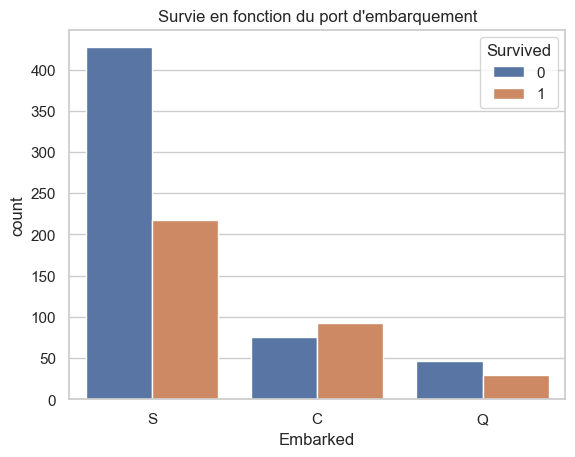

In [11]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survie en fonction du port d'embarquement")
plt.show()

## 🚀 Jour 5 – Préparation et nettoyage des données

Objectif du jour :
Avant d'entraîner un modèle, il faut que les données soient propres et utilisables. Aujourd'hui, tu vas faire ton premier vrai data preprocessing comme une pro !

### 🟣 Étape 1 : Vérifier les valeurs manquantes

In [12]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 🟣 Étape 2 : Décision stratégique

In [13]:
# ❌ On va supprimer la colonne Cabin car trop de données manquent.
df = df.drop(["Cabin"], axis=1)

In [14]:
# On vérifie si la colonne "Cabin" a bien été supprimé.
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### 🟣 Étape 3 : Remplir les valeurs manquantes intelligemment

In [15]:
# On cherche la valeur la plus fréquente dans la colonne "Embarked" :
df['Embarked'].mode()

# S est donc la valeur la plus fréquente (le mode).

0    S
Name: Embarked, dtype: object

In [16]:
# ✔️ Pour Age, on va remplacer par la médiane :
df['Age'] = df['Age'].fillna(df['Age'].median())

# ✔️ Pour Embarked, on va remplir avec le mode (valeur la plus fréquente) :
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### 🟣 Étape 4 : Encoder les variables catégorielles
Les modèles n’aiment pas les mots, donc on transforme les catégories en chiffres.

In [17]:
# Encodage le sexe "Sex"
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [18]:
# Encodage le port d’embarquement "Embarked"
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

### 🟣 Étape 5 : Vérification finale

In [19]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 17599  71.2833         1  
2  STON/O2. 3101282   7.9250         0  
3            113803  53.1000         0  
4            373450   8.0500         0  


In [20]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Il n'y a plus de valeurs manquantes.

## 🚩 Jour 6 – Crée ton premier modèle (sans stress)
Objectif du jour :

Faire ton premier vrai modèle de Machine Learning pour prédire la survie sur le Titanic 🚢

### 🟣 Étape 1 : Importons le modèle

In [21]:
# On va utiliser un Arbre de Décision (très visuel et très intuitif)
from sklearn.tree import DecisionTreeClassifier

### 🟣 Étape 2 : Préparons les variables pour l’entraînement

In [22]:
# On va choisir les colonnes que tu as bien repérées depuis le début :
features = ['Sex', 'Pclass', 'Age']

X = df[features]   # Les caractéristiques (les questions que posera l’arbre)
y = df['Survived'] # La réponse (1=survécu, 0=pas survécu)

### 🟣 Étape 3 : Découper les données

In [23]:
from sklearn.model_selection import train_test_split

# On va découper nos données pour pouvoir tester si notre modèle a bien appris. 50% des données pour apprendre et 50% pour tester.
# Comme à l’école : on apprend sur une partie, puis on vérifie sur un contrôle surprise.
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### 🟣 Étape 4 : Entraîner l’arbre

C’est ici que l’IA apprend :

In [24]:
# Enseigner au modèle à prédire la survie en lui montrant plein de passagers avec leur caractéristiques.
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

### 🟣 Étape 5 : Tester l’IA (le contrôle surprise)

In [25]:
score = model.score(x_train, y_train)
print(f"Précision du modèle : {round(score*100, 2)} %")

Précision du modèle : 88.76 %


La précision du modèle avec juste "Sex", "Pclass", et "Age" est de 88,76 %

## Jour 7 – Visualisation & compréhension de ton arbre

Objectif du jour :


- Voir le modèle "penser" !


- Tu vas aujourd'hui dessiner l'arbre et découvrir exactement quelles règles il a apprises pour prédire la survie.

### 🟣 Étape 1 : Importer l’outil de visualisation

In [26]:
from sklearn import tree
# import matplotlib.pyplot as plt -> déjà importé

### 🟣 Étape 2 : Dessiner l’arbre (version brute)

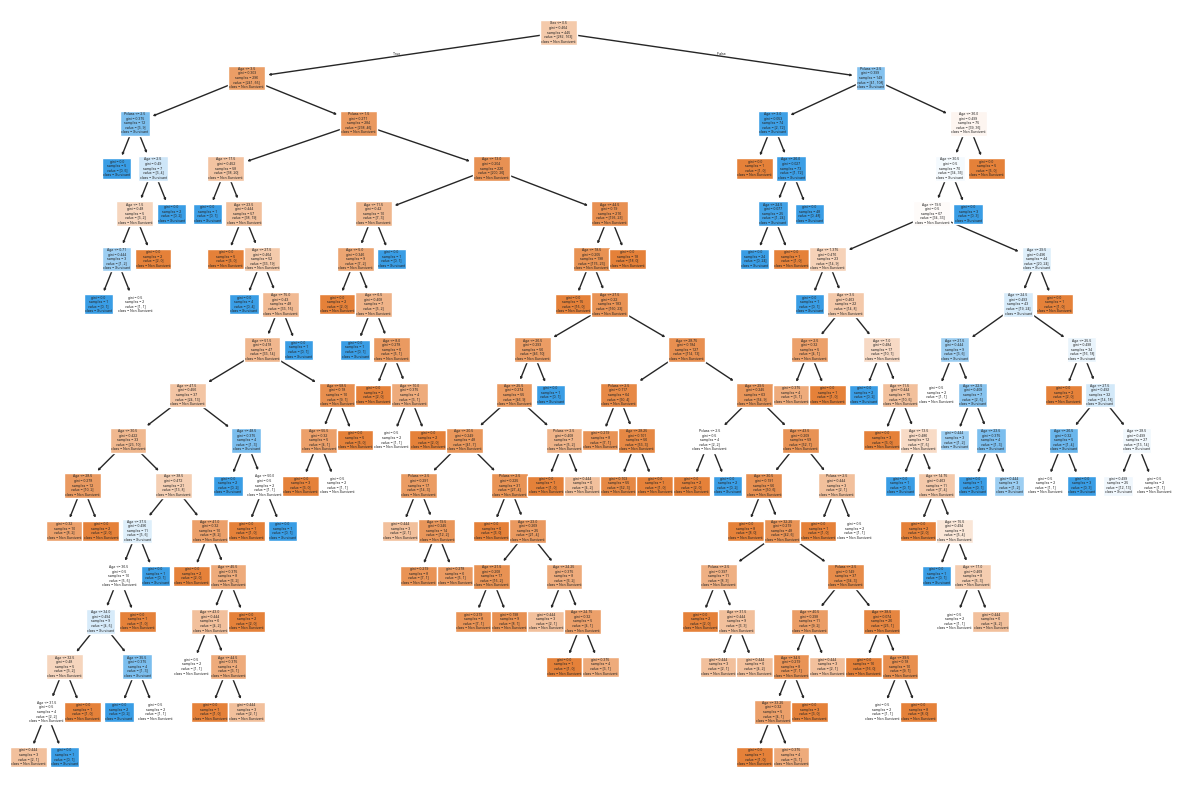

In [27]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=features, class_names=['Non Survivant', 'Survivant'], filled=True)
plt.show()

Apparition de l’arbre comme un organigramme :

1. Chaque question est une condition (exemple : Sex <= 0.5)

2. Chaque branche mène à une décision : survivant ou non



### 🟣 Étape 5 (Bonus) : Limiter la taille de l’arbre

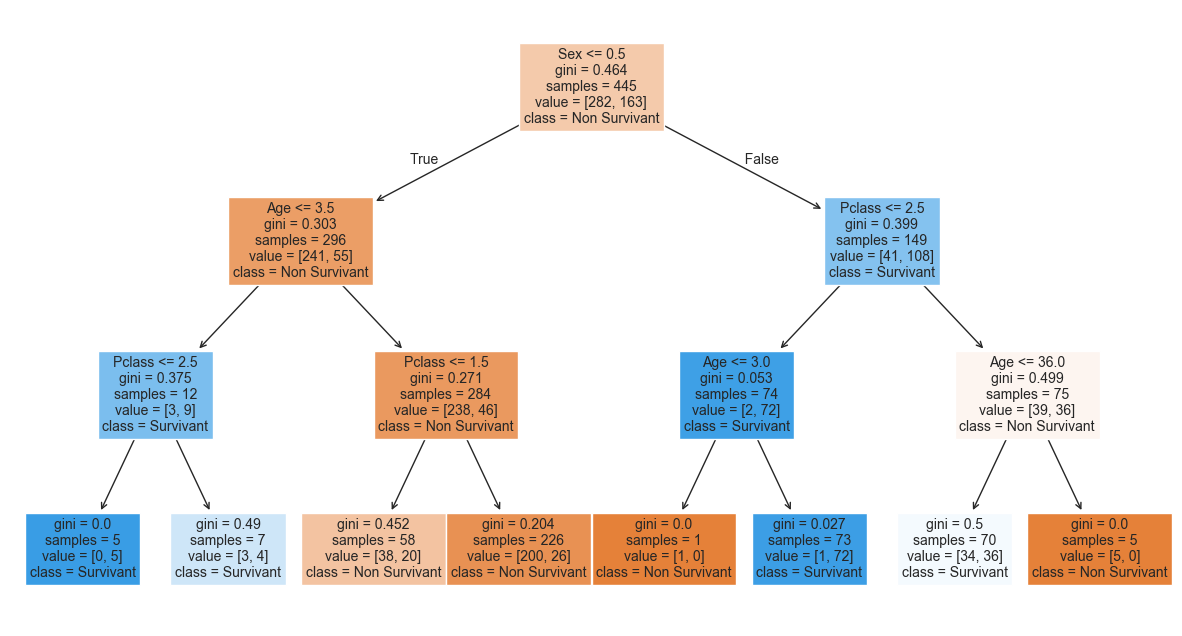

In [28]:
#👉 Avec max_depth=3, tu limites l’arbre à 3 niveaux pour mieux visualiser les règles de base.
model_simple = DecisionTreeClassifier(max_depth=3)
model_simple.fit(x_train, y_train)

plt.figure(figsize=(15,8))
tree.plot_tree(model_simple, feature_names=features, class_names=['Non Survivant', 'Survivant'], filled=True)
plt.show()

## 🚩 Jour 8 – Améliorer ton modèle
Objectif :

1. Ajouter quelques variables intelligemment

2. Essayer d’augmenter la précision de ton modèle

3. Préparer le modèle pour être plus crédible dans ton futur portfolio



## 🟣 Étape 1 : Ajouter de nouvelles variables
Tu vas enrichir ton modèle avec :

- SibSp = nombre de frères/sœurs/conjoint à bord

- Parch = nombre de parents/enfants à bord

- Fare = prix du billet

- Embarked = port d'embarquement

In [29]:
"""
features = ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
"""

"\nfeatures = ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']\nX = df[features]\n"

### 🟣 Étape 2 : Réentraînement du modèle

In [30]:
"""
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Nouveau modèle
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Score
score = model.score(X_test, y_test)
print(f"Nouvelle précision du modèle : {round(score*100, 2)} %")
"""

'\n# Split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)\n\n# Nouveau modèle\nmodel = DecisionTreeClassifier()\nmodel.fit(X_train, y_train)\n\n# Score\nscore = model.score(X_test, y_test)\nprint(f"Nouvelle précision du modèle : {round(score*100, 2)} %")\n'

### 🟣 Étape 3 : Visualisation "propre" pour portfolio (Bonus)

In [31]:
"""
plt.figure(figsize=(20,10))
tree.plot_tree(model, 
               feature_names=features, 
               class_names=['Non Survivant', 'Survivant'], 
               filled=True, 
               rounded=True, 
               fontsize=10)
plt.title("Arbre de Décision Titanic")
plt.show()
"""

'\nplt.figure(figsize=(20,10))\ntree.plot_tree(model, \n               feature_names=features, \n               class_names=[\'Non Survivant\', \'Survivant\'], \n               filled=True, \n               rounded=True, \n               fontsize=10)\nplt.title("Arbre de Décision Titanic")\nplt.show()\n'

In [32]:
"""
# Arbre lisible & clean
model_simple = DecisionTreeClassifier(max_depth=3)
model_simple.fit(X_train, y_train)

plt.figure(figsize=(12,8))
tree.plot_tree(model_simple, 
               feature_names=features, 
               class_names=['Non Survivant', 'Survivant'], 
               filled=True, 
               rounded=True, 
               fontsize=10)
plt.title("Arbre simplifié")
plt.show()
"""

'\n# Arbre lisible & clean\nmodel_simple = DecisionTreeClassifier(max_depth=3)\nmodel_simple.fit(X_train, y_train)\n\nplt.figure(figsize=(12,8))\ntree.plot_tree(model_simple, \n               feature_names=features, \n               class_names=[\'Non Survivant\', \'Survivant\'], \n               filled=True, \n               rounded=True, \n               fontsize=10)\nplt.title("Arbre simplifié")\nplt.show()\n'

## 🧭 Jour 9 – Comparer plusieurs modèles ML
Objectif du jour :

Tester plusieurs algorithmes et voir lequel fait le meilleur job pour ton projet Titanic. Tu vas comprendre que chaque modèle a sa personnalité, ses forces et ses faiblesses 💡



### 🟣 Étape 1 – Prépare tes données (les plus simples)

In [33]:
# On revient à nos 3 variables qui ont bien marché :
features = ['Sex', 'Pclass', 'Age']
X = df[features]
y = df['Survived']

# Split pour entraînement/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### 🟣 Étape 2 – Importer tous les modèles

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### 🟣 Étape 3 – Créer, entraîner et tester chaque modèle

In [35]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier()
}

# Dictionnaire pour stocker les scores
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = round(score * 100, 2)

# Affichage des résultats
for name, score in results.items():
    print(f"{name} : {score} % de précision")


Decision Tree : 79.6 % de précision
Random Forest : 80.04 % de précision
Logistic Regression : 80.94 % de précision
KNN : 73.99 % de précision


## 📊 Jour 10 – Comparaison visuelle des modèles + choix final

Objectif du jour :

Rendre ton travail clair et visuel pour toi, ton futur toi… et surtout les recruteurs ou encadrants !
Tu vas créer un joli graphe de comparaison des modèles que tu pourras réutiliser dans ta mini-app ou ton rapport.

### 🟣 Étape 1 – On récupère les résultats

In [36]:
# On reprend le dictionnaire du jour 9
results = {
    "Decision Tree": 79.6,
    "Random Forest": 80.49,
    "Logistic Regression": 80.94,
    "KNN": 73.99
}

### 🟣 Étape 2 – Création du bar chart

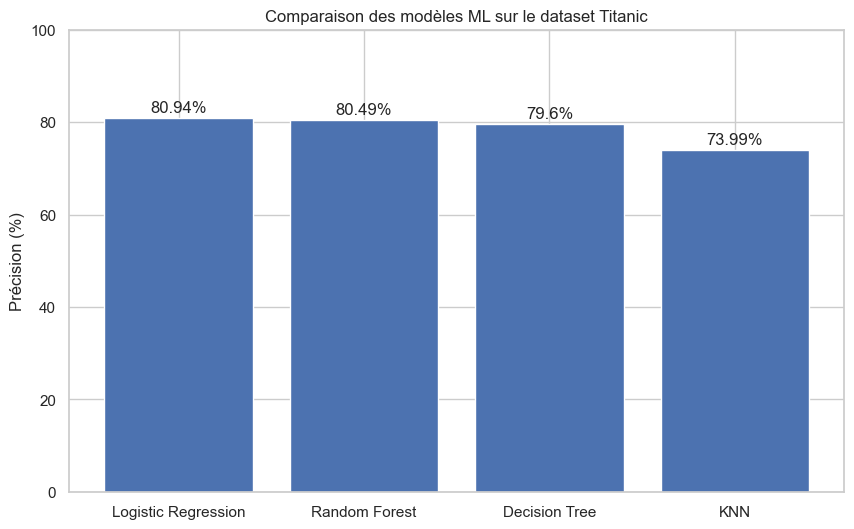

In [37]:
# Tri des modèles par score (facultatif mais propre)
results_sorted = dict(sorted(results.items(), key=lambda x: x[1], reverse=True)) # -> Prends ces résultats, trier-les du modèle le plus performant au moins performant, puis cela donne un nouveau dictionnaire propre

# Données pour le graphe
model_names = list(results_sorted.keys())
scores = list(results_sorted.values())

# Création du graphe
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scores)

# Ajouter des pourcentages sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval}%', ha='center', va='bottom') # -> Pour chaque barre, écrire le score juste au-dessus, bien centré et propre
    
plt.title("Comparaison des modèles ML sur le dataset Titanic")
plt.ylabel("Précision (%)")
plt.ylim(0, 100)
plt.show()